In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

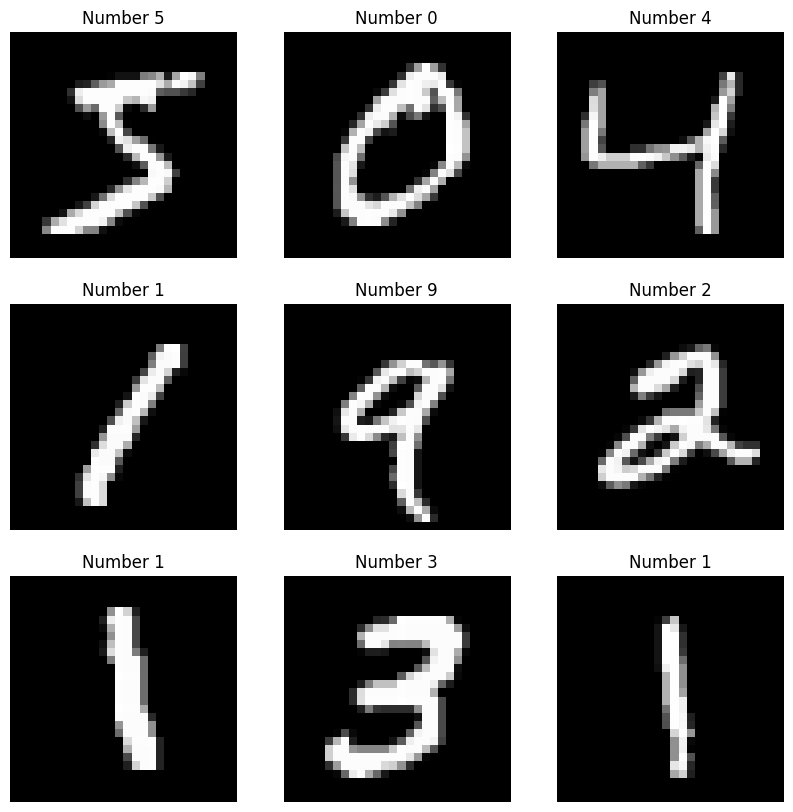

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
plt.show()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import numpy as np
new = x_train.reshape(x_train.shape[0], -1)
new.shape

(60000, 784)

In [5]:
from core.nn import NN
from core.plot import draw_dot
net = NN(784, [16, 16, 10])
net.layer_sizes

[784, 16, 16, 10]

In [6]:
batch_size = 1
losses, accuracies = [], []

In [7]:
samp = np.random.randint(0, x_train.shape[0], size=batch_size)
samp

array([33613])

In [8]:
print(x_train[samp].shape)
print(x_train[samp].reshape(x_train[samp].shape[0], -1).shape)
x = x_train[samp].reshape(x_train[samp].shape[0], -1)
print(y_train[samp].shape)

(1, 28, 28)
(1, 784)
(1,)


In [9]:
from core.functional import softmax
from core.engine import Value
net.zero_grad()
floats = np.array(x, dtype=float)
xs = floats.tolist()
ys = np.array(y_train, dtype=float)

In [11]:
for k in range(100):
    # forward pass
    pre = [net(x) for x in xs]
    sm = [softmax(pred) for pred in pre]
    ypred = [np.argmax(s) for s in sm]
    loss = Value(sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)))

    # backward pass
    net.zero_grad()
    loss.backward()
    
    # update
    for p in net.parameters:
        p.data += -0.1 * p.grad
        
    if k % 10 == 0:
        print(k, loss.data)
        
print(ypred)

C:\Users\pierr\Git\deep-learning-framework\core\engine.py:94: RuntimeWarning: overflow encountered in exp
  data = (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
C:\Users\pierr\Git\deep-learning-framework\core\engine.py:94: RuntimeWarning: invalid value encountered in scalar divide
  data = (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)


0 25.0
10 25.0
20 25.0
30 25.0
40 25.0
50 25.0
60 25.0
70 25.0
80 25.0
90 25.0
[0]
